<a href="https://colab.research.google.com/github/DevRitikRaj/Youtube_Text_Summeriser_Golden_project_02_CodeClause/blob/main/youtube_transcript_summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.5 MB/s eta 0:00:00


In [ ]:
pip install -q youtube_transcript_api

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:
youtube_video = "https://www.youtube.com/watch?v=rcDhvR3oeiE"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'rcDhvR3oeiE'

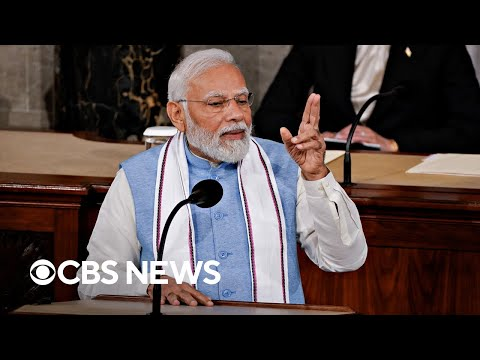

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [ ]:
transcript[0:5]

[{'text': '[Applause]', 'start': 2.61, 'duration': 44.219},
 {'text': '[Applause]', 'start': 57.8, 'duration': 21.9},
 {'text': '[Applause]', 'start': 89.61, 'duration': 14.26},
 {'text': '[Applause]', 'start': 107.62, 'duration': 2.86},
 {'text': '[Music]', 'start': 109.87, 'duration': 28.62}]

In [ ]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

19644


In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)


input text 
 [Applause] [Applause] [Applause] [Applause] [Music] [Applause] [Applause] members of Congress I have the high privilege and distinct honor of presenting to you his Excellency narenda Modi the prime minister of the Republic of India thank you [Applause] Mr Speaker Madam vice president distinguished members of the U.S Congress ladies and gentlemen namaskar [Applause] [Music] [Applause] it is always a great honor to address the United States Congress exceptional privilege to do so twice [Applause] for this honor I extend my deepest gratitude on behalf of the 1.4 billion people of India [Applause] I see that nearly half of you were here in 2016. I feel your warm as old friends I can also see the enthusiasm of a new friends in the other half I remember senator Harry Reid senator John McCain senator or in Hatch Elijah Cummings Elsie Hastings and others who I met here in 2016. and who are sadly no longer with us Mr Speaker standing here seven Junes ago that is the June when Hamil

Your max_length is set to 142, but your input_length is only 133. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=66)


Summarized text
 There is always lights if only we are brave enough to see it right our trusted partnership is like the sun in this new dawn that we spread light all around [Applause] I am reminded of a poem that I once wrought Osman foreign if I were to say it in English it would be Rising its head in the skies piercing through the dense crowds with the promise of light the sun has just risen armed with a deep resolve overcoming all the odds .
input text 
guished members even by the highest standards of our partnership this visit is one of the great positive transformation together we shall demonstrate the democracy is better and democracies deliver thank you [Applause] I count on your continued support to the India U.S partnership when I was here in 2016 I said that our relationship relationship is Prime for a momentous future that future is today thank you thank you once again Mr Speaker Madam vice president and the distinguished members of this honor God Bless America long live Ind

In [ ]:
len(str(summarized_text))

7155

In [ ]:
str(summarized_text)

'[\' Mr Speaker Madam vice president presented to you his Excellency narenda Modi the prime minister of the Republic of India thank you [Applause] Mr Speaker . Mr Speaker: "It is always a great honor to address the United States Congress twice. I extend my deepest gratitude on behalf of the 1.4 billion people of India"\', \' I said that the hesitations of History were behind us now when our era it is a cross as is at a Crossroads I am here to speak about our calling for this century [Applause] A lot has changed since I came here seven summers ago but a lord has remained the same like our commitment to deepen the friendship between India and the United States .\', \' I am delighted to see you come together today to celebrate the bond between worlds two great democracies India and the United States [Applause] I am happy to help out. being a city and of a vibrant democracy myself I can admit one thing Mr Speaker you have a tough job. I can relate to the battle suppression persuasion and p